In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report,roc_auc_score
from sklearn.inspection import permutation_importance
import xgboost as xgb
from scipy.stats import pointbiserialr, chi2_contingency
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [3]:
import pandas as pd
df = pd.read_csv(r"C:\Users\asus\Music\Hello_World.csv")
df

,age,gender,education_level,employment_status,monthly_income,credit_utilization_ratio,total_credit_limit,late_payments_6m,transaction_frequency,average_transaction_amount,login_frequency,credit_score_checks,luxury_purchase_ratio,savings_rate,debt_to_income,credit_score
0,40,Male,Bachelor,Unemployed,3075.71,43.882667,12288.470646,5,32,122.927413,13,0,0.279732,0.321871,0.876984,1
1,36,Female,Master,Employed,4224.22,6.276654,11669.772882,4,30,253.398786,11,1,0.624207,0.088496,0.613725,1
2,43,Male,Bachelor,Employed,4037.93,5.464899,16257.911561,2,28,160.690043,14,2,0.153837,0.135432,0.556809,0
3,52,Female,High School,Self-Employed,3257.82,37.897596,15172.362148,3,28,76.059006,19,7,0.200288,0.335633,0.327865,0
4,35,Male,PhD,Employed,4063.68,16.172157,19469.636474,1,54,156.283499,11,2,0.065791,0.281460,0.604514,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,35,Male,High School,Self-Employed,5692.00,19.248471,22059.799510,1,27,89.745581,12,6,0.033139,0.177800,0.248493,0
49996,36,Female,Bachelor,Employed,5576.83,56.573087,11923.194954,1,43,127.594879,19,2,0.196269,0.146693,0.604514,0
49997,40,Male,Bachelor,Unemployed,4326.97,20.753516,9941.729735,2,36,90.369409,16,3,0.104400,0.259277,0.449366,0
49998,37,Female,Bachelor,Self-Employed,6000.00,44.376491,27748.132322,2,25,131.025516,17,2,0.306811,0.053442,1.285028,0


In [4]:
df.dtypes # to check data type of all the columns

age                             int64
gender                         object
education_level                object
employment_status              object
monthly_income                float64
credit_utilization_ratio      float64
total_credit_limit            float64
late_payments_6m                int64
transaction_frequency           int64
average_transaction_amount    float64
login_frequency                 int64
credit_score_checks             int64
luxury_purchase_ratio         float64
savings_rate                  float64
debt_to_income                float64
credit_score                    int64
dtype: object

In [35]:
# from sklearn.preprocessing import LabelEncoder

# # Categorical columns to encode
# categorical_cols = ['gender', 'education_level', 'employment_status']

# # Dictionary to store mappings
# label_mappings = {}

# # Apply LabelEncoder with mapping
# for col in categorical_cols:
#     le = LabelEncoder()
#     df[col] = le.fit_transform(df[col].astype(str))  # Ensure string type
#     label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))  # Save mapping

# # Print the mappings
# for col, mapping in label_mappings.items():
#     print(f"{col} mapping: {mapping}")


In [5]:
df

,age,gender,education_level,employment_status,monthly_income,credit_utilization_ratio,total_credit_limit,late_payments_6m,transaction_frequency,average_transaction_amount,login_frequency,credit_score_checks,luxury_purchase_ratio,savings_rate,debt_to_income,credit_score
0,40,Male,Bachelor,Unemployed,3075.71,43.882667,12288.470646,5,32,122.927413,13,0,0.279732,0.321871,0.876984,1
1,36,Female,Master,Employed,4224.22,6.276654,11669.772882,4,30,253.398786,11,1,0.624207,0.088496,0.613725,1
2,43,Male,Bachelor,Employed,4037.93,5.464899,16257.911561,2,28,160.690043,14,2,0.153837,0.135432,0.556809,0
3,52,Female,High School,Self-Employed,3257.82,37.897596,15172.362148,3,28,76.059006,19,7,0.200288,0.335633,0.327865,0
4,35,Male,PhD,Employed,4063.68,16.172157,19469.636474,1,54,156.283499,11,2,0.065791,0.281460,0.604514,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,35,Male,High School,Self-Employed,5692.00,19.248471,22059.799510,1,27,89.745581,12,6,0.033139,0.177800,0.248493,0
49996,36,Female,Bachelor,Employed,5576.83,56.573087,11923.194954,1,43,127.594879,19,2,0.196269,0.146693,0.604514,0
49997,40,Male,Bachelor,Unemployed,4326.97,20.753516,9941.729735,2,36,90.369409,16,3,0.104400,0.259277,0.449366,0
49998,37,Female,Bachelor,Self-Employed,6000.00,44.376491,27748.132322,2,25,131.025516,17,2,0.306811,0.053442,1.285028,0


In [6]:
df.isnull().sum()

age                           0
gender                        0
education_level               0
employment_status             0
monthly_income                0
credit_utilization_ratio      0
total_credit_limit            0
late_payments_6m              0
transaction_frequency         0
average_transaction_amount    0
login_frequency               0
credit_score_checks           0
luxury_purchase_ratio         0
savings_rate                  0
debt_to_income                0
credit_score                  0
dtype: int64

In [7]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# One-hot encode the categorical features
df_encoded = pd.get_dummies(df, columns=['gender', 'education_level', 'employment_status'], drop_first=True)

X = df_encoded.drop('credit_score', axis=1)
y = df_encoded['credit_score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split


In [9]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [10]:
y_pred_rf = rf_model.predict(X_test)

In [11]:
print("✅ Accuracy:", accuracy_score(y_test, y_pred_rf))
print("🎯 Precision:", precision_score(y_test, y_pred_rf, average='macro'))
print("📈 Recall:", recall_score(y_test, y_pred_rf, average='macro'))
print("📊 F1 Score:", f1_score(y_test, y_pred_rf, average='macro'))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred_rf))


✅ Accuracy: 0.8816
🎯 Precision: 0.8182556300258508
📈 Recall: 0.7363322739317183
📊 F1 Score: 0.7669465853383735

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      8241
           1       0.73      0.51      0.60      1759

    accuracy                           0.88     10000
   macro avg       0.82      0.74      0.77     10000
weighted avg       0.87      0.88      0.87     10000



In [14]:
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# cm = confusion_matrix(y_test, y_pred_rf)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
# disp.plot(cmap=plt.cm.Blues)
# plt.title("Confusion Matrix")
# plt.show()


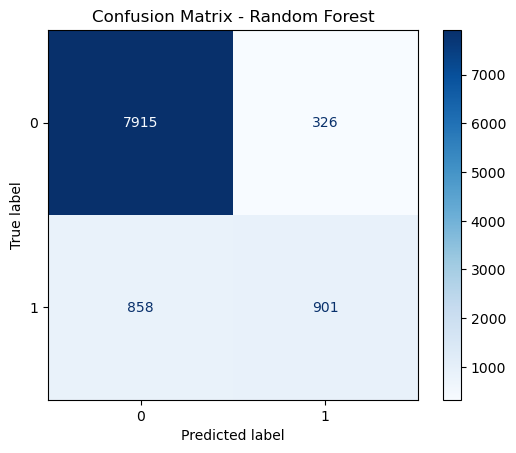

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()


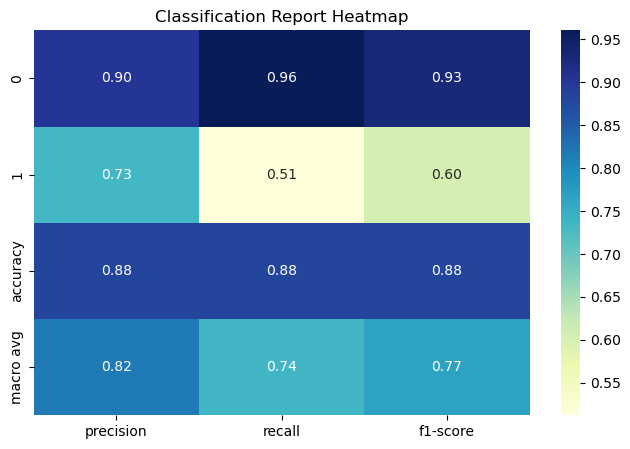

In [17]:
from sklearn.metrics import classification_report
import pandas as pd

report_dict = classification_report(y_test, y_pred_rf, output_dict=True)
df_report = pd.DataFrame(report_dict).transpose()

plt.figure(figsize=(8, 5))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report Heatmap")
plt.show()


In [44]:
print(X_train.columns.tolist())

['age', 'monthly_income', 'credit_utilization_ratio', 'total_credit_limit', 'late_payments_6m', 'transaction_frequency', 'average_transaction_amount', 'login_frequency', 'credit_score_checks', 'luxury_purchase_ratio', 'savings_rate', 'debt_to_income', 'gender_Male', 'gender_Other', 'education_level_High School', 'education_level_Master', 'education_level_PhD', 'employment_status_Retired', 'employment_status_Self-Employed', 'employment_status_Unemployed']


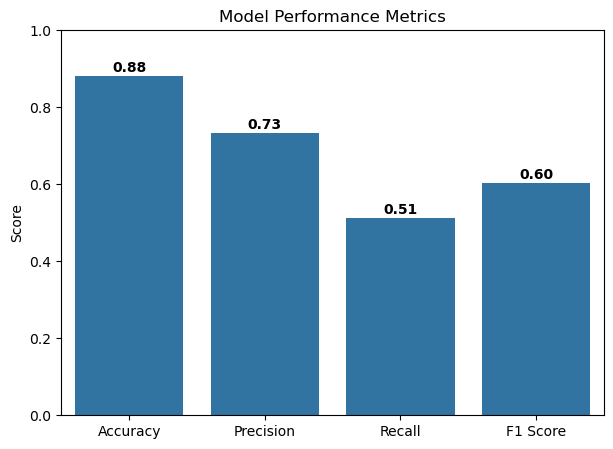

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "F1 Score": f1_score(y_test, y_pred_rf)
}

plt.figure(figsize=(7, 5))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()))
plt.ylim(0, 1)
plt.title("Model Performance Metrics")
plt.ylabel("Score")
for i, v in enumerate(metrics.values()):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()


In [19]:
# Cross Validation
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

print("🔁 Cross-Validation Scores:", cv_scores)
print("📊 Average CV Accuracy:", cv_scores.mean())


🔁 Cross-Validation Scores: [0.8732 0.8699 0.8733 0.8736 0.8766]
📊 Average CV Accuracy: 0.87332


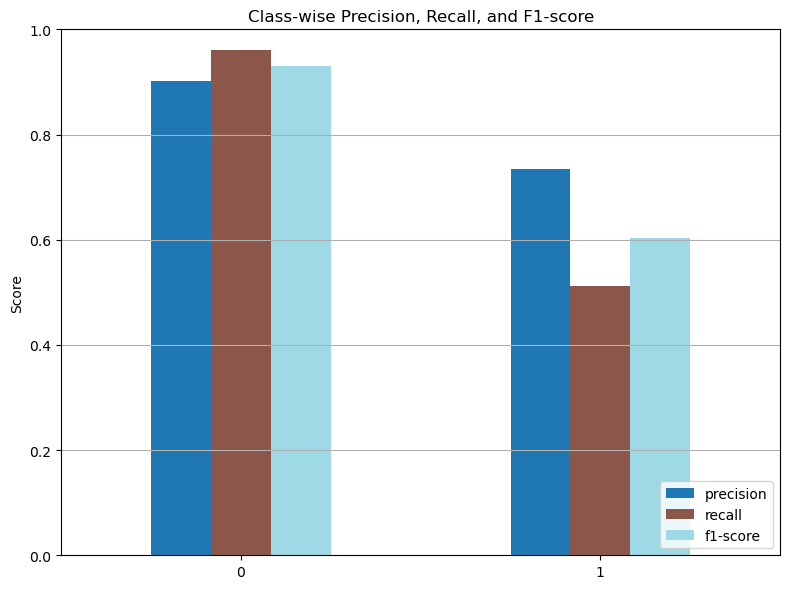

In [20]:
df_class = df_report.loc[["0", "1"], ["precision", "recall", "f1-score"]]

df_class.plot(kind='bar', figsize=(8, 6), colormap='tab20', rot=0)
plt.title("Class-wise Precision, Recall, and F1-score")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [22]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100],
    'max_depth': [10, 20],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'bootstrap': [True]
}

# Initialize GridSearch
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit GridSearch
grid_search.fit(X_train, y_train)

# Best parameters and score
print("✅ Best Parameters:", grid_search.best_params_)
print("🎯 Best Cross-Validation Score:", grid_search.best_score_)

# Evaluate the best model on test set
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)
print("📌 Accuracy on Test Set:", accuracy_score(y_test, y_pred_best_rf))


Fitting 5 folds for each of 2 candidates, totalling 10 fits
✅ Best Parameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
🎯 Best Cross-Validation Score: 0.872175
📌 Accuracy on Test Set: 0.8831


In [23]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, auc,
    precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# 🧮 Metrics
accuracy = accuracy_score(y_test, y_pred_best_rf)
precision = precision_score(y_test, y_pred_best_rf)
recall = recall_score(y_test, y_pred_best_rf)
f1 = f1_score(y_test, y_pred_best_rf)

# 📊 Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best_rf)
report = classification_report(y_test, y_pred_best_rf)

# 📌 Print metrics
print("📊 Classification Report:\n", report)
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")
print(f"✅ F1 Score: {f1:.4f}")


📊 Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      8241
           1       0.74      0.52      0.61      1759

    accuracy                           0.88     10000
   macro avg       0.82      0.74      0.77     10000
weighted avg       0.87      0.88      0.88     10000

✅ Accuracy: 0.8831
✅ Precision: 0.7352
✅ Recall: 0.5242
✅ F1 Score: 0.6120


In [60]:
print("✅ Accuracy:", accuracy_score(y_test, y_pred_rf))
print("🎯 Precision:", precision_score(y_test, y_pred_rf, average='macro'))
print("📈 Recall:", recall_score(y_test, y_pred_rf, average='macro'))
print("📊 F1 Score:", f1_score(y_test, y_pred_rf, average='macro'))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred_rf))


✅ Accuracy: 0.8816
🎯 Precision: 0.8182556300258508
📈 Recall: 0.7363322739317183
📊 F1 Score: 0.7669465853383735

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      8241
           1       0.73      0.51      0.60      1759

    accuracy                           0.88     10000
   macro avg       0.82      0.74      0.77     10000
weighted avg       0.87      0.88      0.87     10000



In [48]:
# Predict using the best model
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Metrics
from sklearn.metrics import accuracy_score, classification_report
print("📌 Test Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))


📌 Test Accuracy: 0.8831

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      8241
           1       0.74      0.52      0.61      1759

    accuracy                           0.88     10000
   macro avg       0.82      0.74      0.77     10000
weighted avg       0.87      0.88      0.88     10000



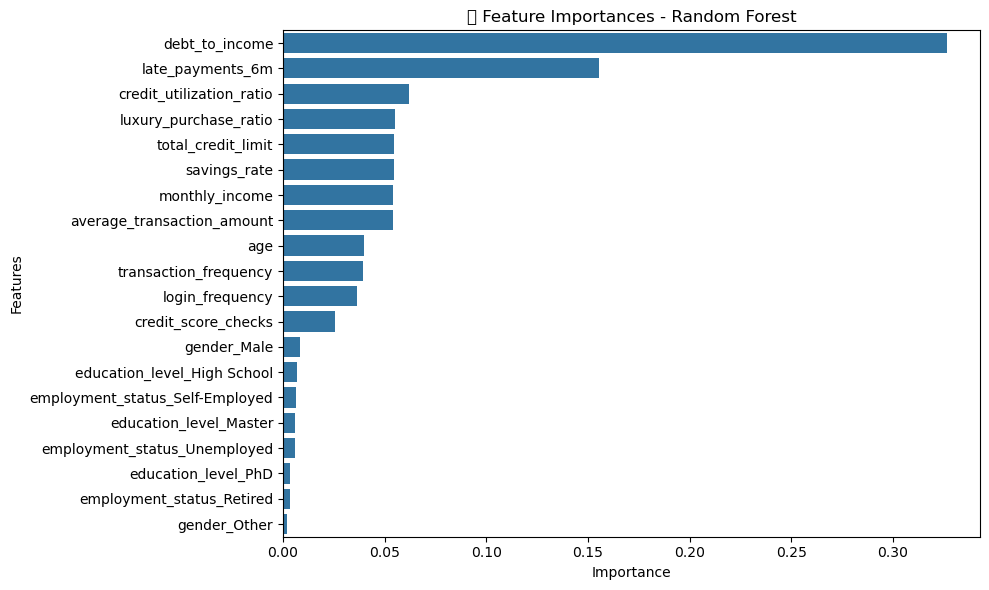

In [47]:
import numpy as np
importances = best_rf_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("🎯 Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


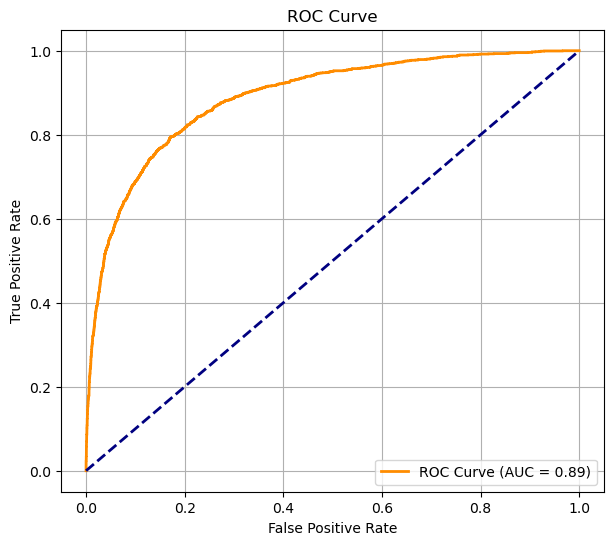

In [53]:
from sklearn.metrics import roc_curve, auc

# Predict probability scores
y_probs = best_rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


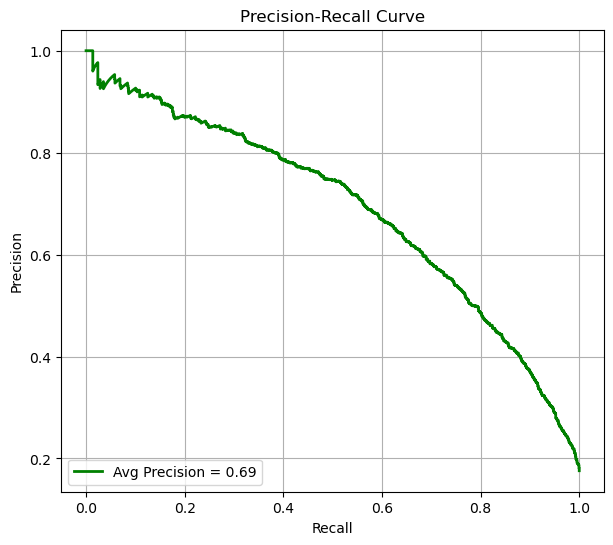

In [54]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds_pr = precision_recall_curve(y_test, y_probs)
avg_precision = average_precision_score(y_test, y_probs)

# Plotting
plt.figure(figsize=(7, 6))
plt.plot(recall, precision, color='green', lw=2, label=f'Avg Precision = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()


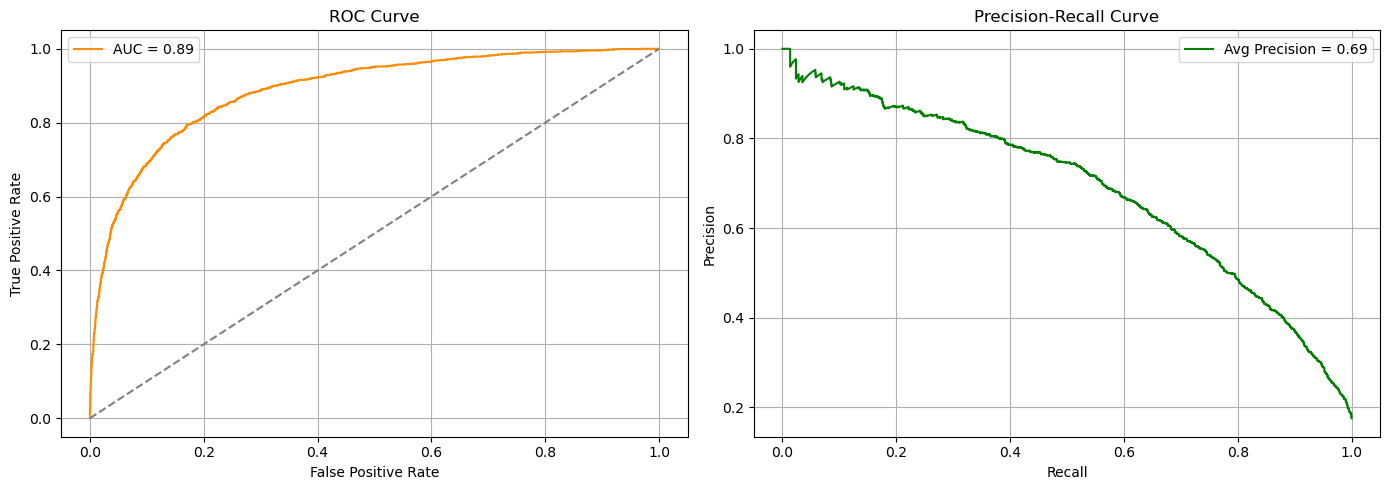

In [55]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# ROC
axs[0].plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='darkorange')
axs[0].plot([0, 1], [0, 1], linestyle='--', color='gray')
axs[0].set_title('ROC Curve')
axs[0].set_xlabel('False Positive Rate')
axs[0].set_ylabel('True Positive Rate')
axs[0].legend()
axs[0].grid(True)

# PR
axs[1].plot(recall, precision, label=f'Avg Precision = {avg_precision:.2f}', color='green')
axs[1].set_title('Precision-Recall Curve')
axs[1].set_xlabel('Recall')
axs[1].set_ylabel('Precision')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import pickle
with open("credit_columns.pkl", "wb") as f:
    pickle.dump(X_train.columns.tolist(), f)

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

# 1. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_split = RandomForestClassifier(random_state=42)
model_split.fit(X_train, y_train)
y_pred = model_split.predict(X_test)

split_accuracy = accuracy_score(y_test, y_pred)
print("🔵 Train-Test Split Accuracy:", round(split_accuracy, 4))

# 2. Cross-Validation (5-fold)
model_cv = RandomForestClassifier(random_state=42)
cv_scores = cross_val_score(model_cv, X, y, cv=5, scoring='accuracy')

cv_mean = cv_scores.mean()
cv_std = cv_scores.std()
print("🟢 Cross-Validation Accuracy: ", round(cv_mean, 4), "+/-", round(cv_std, 4))


🔵 Train-Test Split Accuracy: 0.8816
🟢 Cross-Validation Accuracy:  0.8733 +/- 0.0021


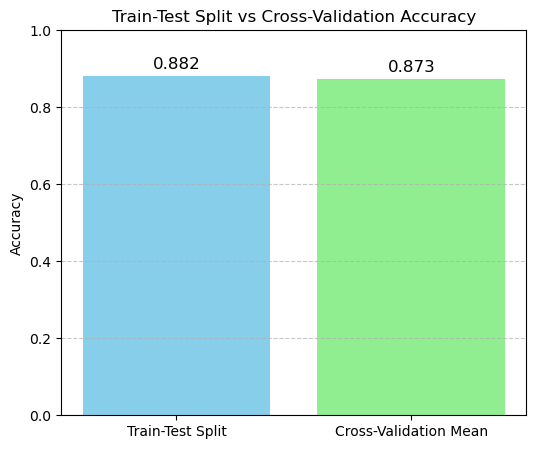

In [57]:
import matplotlib.pyplot as plt

labels = ['Train-Test Split', 'Cross-Validation Mean']
scores = [split_accuracy, cv_mean]

plt.figure(figsize=(6, 5))
bars = plt.bar(labels, scores, color=['skyblue', 'lightgreen'])
plt.title("Train-Test Split vs Cross-Validation Accuracy")
plt.ylabel("Accuracy")
plt.ylim(0, 1)

# Add value labels on top
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.3f}', ha='center', va='bottom', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


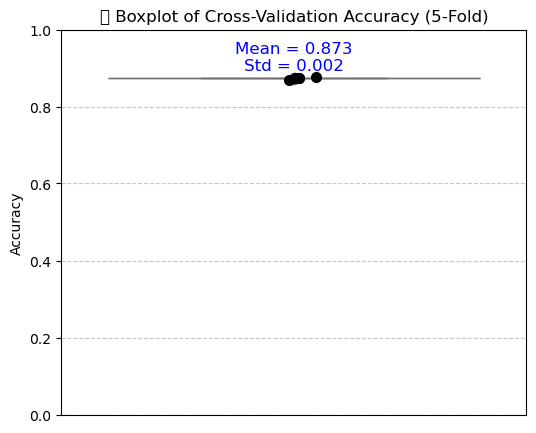

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

# Random Forest model
model = RandomForestClassifier(random_state=42)

# Get cross-validation scores
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# 📊 Boxplot
plt.figure(figsize=(6, 5))
sns.boxplot(data=cv_scores, color='lightgreen')
sns.stripplot(data=cv_scores, color='black', size=8, jitter=True)  # Shows individual fold scores

plt.title("📦 Boxplot of Cross-Validation Accuracy (5-Fold)")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks([], [])  # Hide x-ticks for clean look

# Annotate mean & std
mean_score = cv_scores.mean()
std_score = cv_scores.std()
plt.text(0, mean_score + 0.02, f"Mean = {mean_score:.3f}\nStd = {std_score:.3f}", 
         fontsize=12, color='blue', ha='center')

plt.show()


In [61]:
import joblib

# Assuming your model is named `rf_model`
joblib.dump(rf_model, "random_forest_model.joblib")
print("✅ Model saved as random_forest_model.joblib")


✅ Model saved as random_forest_model.joblib
